# Classification of dog and cat pictures

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

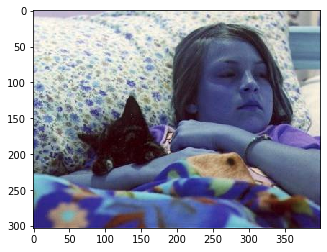

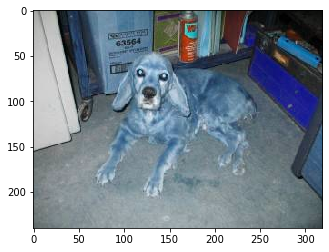

[[[154 155 153]
  [160 161 159]
  [162 163 161]
  ...
  [ 13  14  12]
  [ 12  13  11]
  [ 10  11   9]]

 [[155 156 154]
  [161 162 160]
  [164 165 163]
  ...
  [ 13  14  12]
  [ 12  13  11]
  [ 11  12  10]]

 [[157 158 156]
  [163 164 162]
  [167 168 166]
  ...
  [ 14  15  13]
  [ 13  14  12]
  [ 11  12  10]]

 ...

 [[ 96 106 106]
  [ 96 106 106]
  [ 97 107 107]
  ...
  [ 61  73  77]
  [ 60  72  76]
  [ 59  71  75]]

 [[ 95 105 105]
  [ 95 105 105]
  [ 96 106 106]
  ...
  [ 58  70  74]
  [ 58  70  74]
  [ 57  69  73]]

 [[ 93 103 103]
  [ 94 104 104]
  [ 94 104 104]
  ...
  [ 57  69  73]
  [ 56  68  72]
  [ 56  68  72]]]


In [70]:
dir_file = '/Users/sultanbeishenkulov/third semester/case studies/archive 2/training_set/training_set'

class_category = ["cats", "dogs"]

# %% [code]
for category in class_category:  # do dogs and cats
    path = os.path.join(dir_file,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        
        break
    

print(img_array)

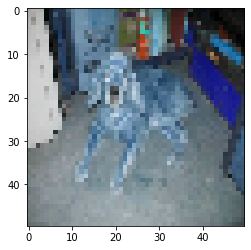

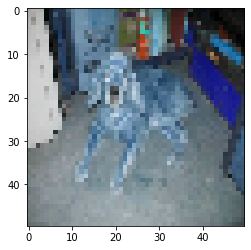

100%|██████████| 100/100 [00:00<00:00, 1630.79it/s]


198
1
1
1
0
0
1
1
1
1
1
[[[[ 64]
   [ 94]
   [ 99]
   ...
   [154]
   [149]
   [112]]

  [[ 32]
   [ 92]
   [125]
   ...
   [153]
   [105]
   [139]]

  [[ 83]
   [ 66]
   [ 66]
   ...
   [122]
   [149]
   [117]]

  ...

  [[167]
   [130]
   [151]
   ...
   [221]
   [106]
   [144]]

  [[ 51]
   [ 91]
   [ 90]
   ...
   [123]
   [162]
   [158]]

  [[ 58]
   [105]
   [105]
   ...
   [157]
   [139]
   [ 88]]]]
3-conv-64-nodes-0-dense-1612695997
Train on 138 samples, validate on 60 samples
Epoch 1/25
138/138 [==============================] - 2s 18ms/sample - loss: 0.6997 - acc: 0.4058 - val_loss: 0.6949 - val_acc: 0.4667
Epoch 2/25
138/138 [==============================] - 1s 10ms/sample - loss: 0.6891 - acc: 0.5580 - val_loss: 0.6955 - val_acc: 0.4667
Epoch 3/25
138/138 [==============================] - 1s 10ms/sample - loss: 0.6863 - acc: 0.5217 - val_loss: 0.6970 - val_acc: 0.4833
Epoch 4/25
138/138 [==============================] - 1s 10ms/sample - loss: 0.6850 - acc: 0.5145 - val_l

In [71]:
# %% [code]
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
training_data = []

# %% [code]
def create_training_data():
    for category in class_category:  # do dogs and cats

        path = os.path.join(dir_file,category)  # create path to dogs and cats
        class_num = class_category.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

# %% [code]
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# %% [code]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)
dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, 
                      y,
                      batch_size=32,
                      epochs=25,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('Cat_vs_Dog-CNN.model')

# %% [code]
import cv2
import tensorflow as tf

class_category = ["cat", "dog"]


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based

    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model('Cat_vs_Dog-CNN.model')

prediction = model.predict([prepare('/Users/sultanbeishenkulov/third semester/case studies/archive/test_set/test_set/cats/cat.4001.jpg')])
print(prediction,'\n')  # will be a list in a list.

print(class_category[int(prediction[0][0])])